### 자전거 대여량을 예측하는 문제 -> 회귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import font_manager, rc

%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

# 그래프에서 한글깨짐 오류에 대한 대처
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
train=pd.read_csv('./train.csv', parse_dates=["datetime"])
train.shape

(10886, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [8]:
# null인 데이터의 합
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

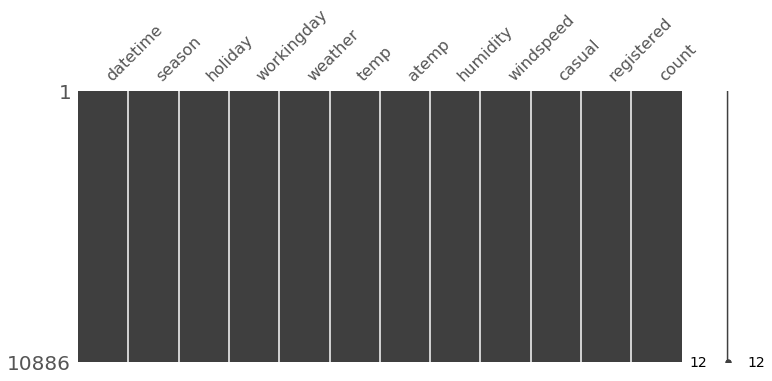

In [9]:
import missingno as msno
msno.matrix(train,figsize=(12,5))

In [10]:
# train df의 datetime을 연,월,일,시,분,초로 나눔
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

In [11]:
train.shape

(10886, 18)

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

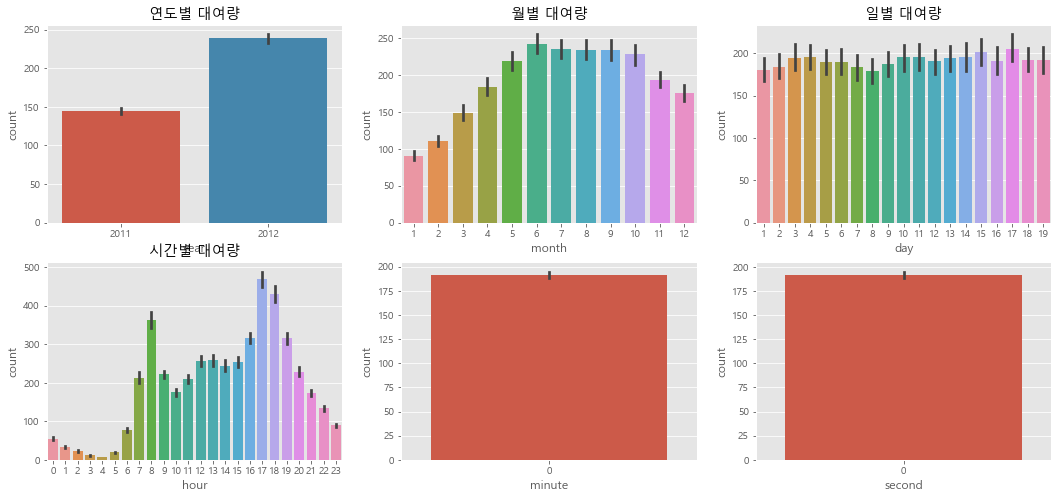

In [18]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train,x='year', y='count', ax=ax1)
sns.barplot(data=train,x='month', y='count', ax=ax2)
sns.barplot(data=train,x='day', y='count', ax=ax3)
sns.barplot(data=train,x='hour', y='count', ax=ax4)
sns.barplot(data=train,x='minute', y='count', ax=ax5)
sns.barplot(data=train,x='second', y='count', ax=ax6)

ax1.set(ylabel='count', title='연도별 대여량')
ax2.set(xlabel='month', title='월별 대여량')
ax3.set(xlabel='day', title='일별 대여량')
ax4.set(xlabel='hour', title='시간별 대여량')

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'working day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

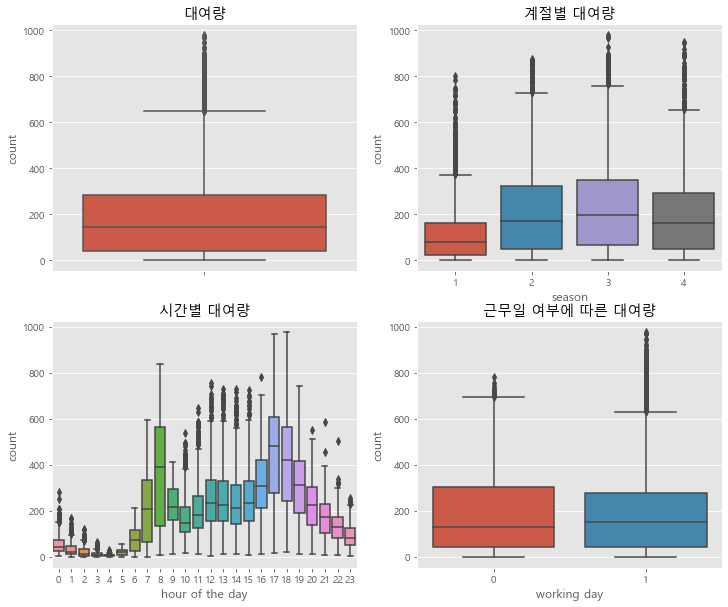

In [20]:
fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season', orient='v', ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=axes[1][1])

axes[0][0].set(ylabel='count', title='대여량')
axes[0][1].set(xlabel='season', ylabel='count', title='계절별 대여량')
axes[1][0].set(xlabel='hour of the day', ylabel='count', title='시간별 대여량')
axes[1][1].set(xlabel='working day', ylabel='count', title='근무일 여부에 따른 대여량')

In [21]:
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [22]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

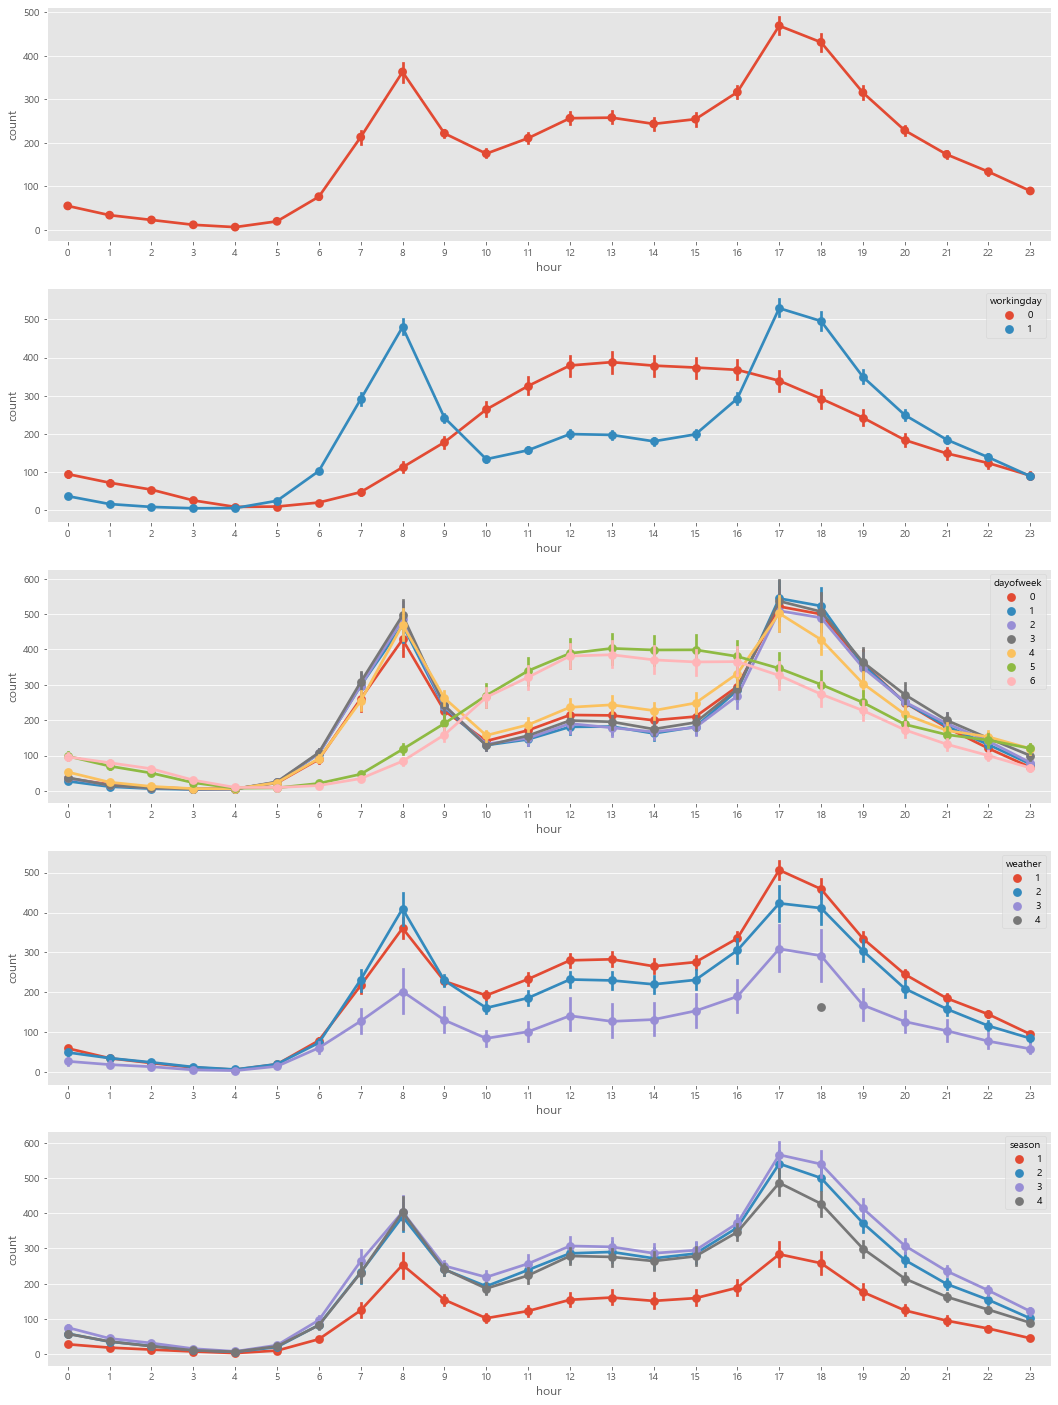

In [23]:
fig, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

In [25]:
corrMatt=train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt=corrMatt.corr()
print(corrMatt)

mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


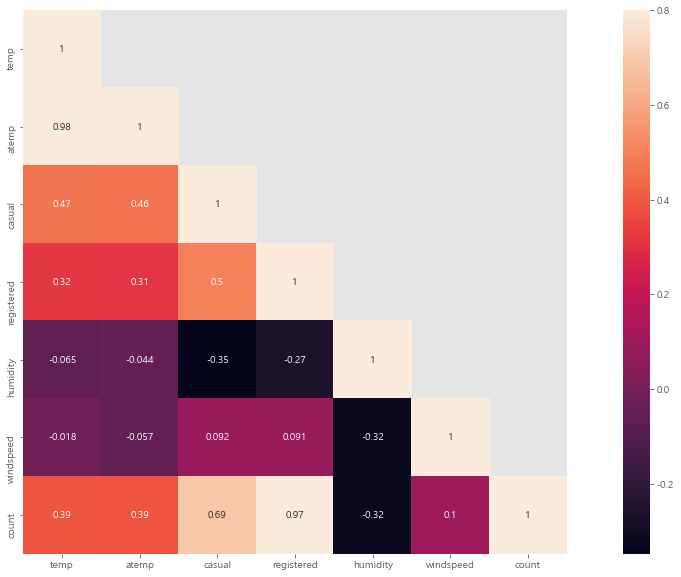

In [26]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt,mask=mask,vmax=.8,square=True,annot=True)

### 온도, 습도, 풍속은 거의 연관관계가 없음
### 대여량과 가장 연관이 높은건 registered로 등록된 대여자가 많지만 test에는 이 값(registered)이 없음
### atemp와 temp는 0.98로 상관관계가 높지만 온도과 체감온도로 feature로 사용하기 부적합

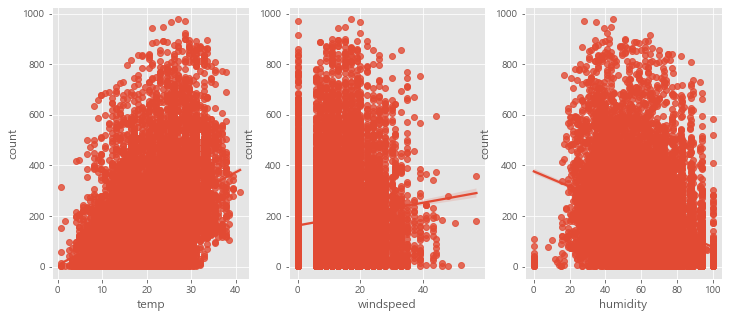

In [27]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp', y='count', data=train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train, ax=ax2)
sns.regplot(x='humidity', y='count', data=train, ax=ax3)
# -> windspeed에서 0일 부분이 많음 -> 이 값은 적절히 처리

In [28]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year,datetime.month)

train['year_month']=train['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime','year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


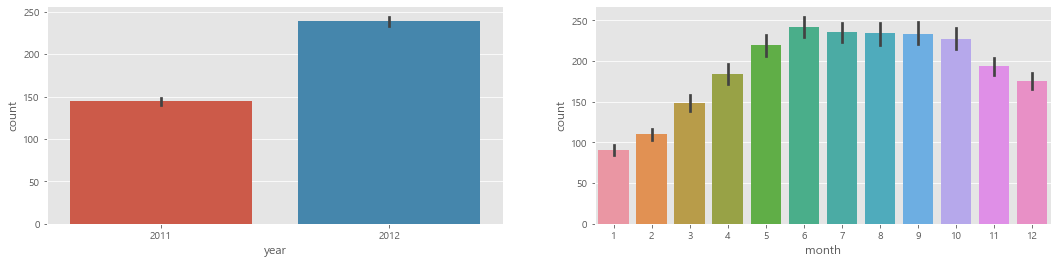

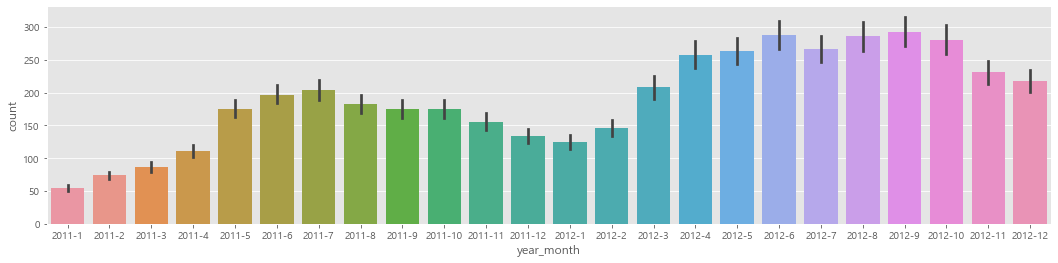

In [29]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train,x='year',y='count',ax=ax1)
sns.barplot(data=train,x='month',y='count',ax=ax2)

fig,ax3=plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train,x='year_month',y='count',ax=ax3)

In [31]:
# outlier제거
trainWithoutOutliers=train[np.abs(train['count']-train['count'].mean()) <= (3*train['count']).std()]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229772, 4.562423868087808, 0.958117678090961))

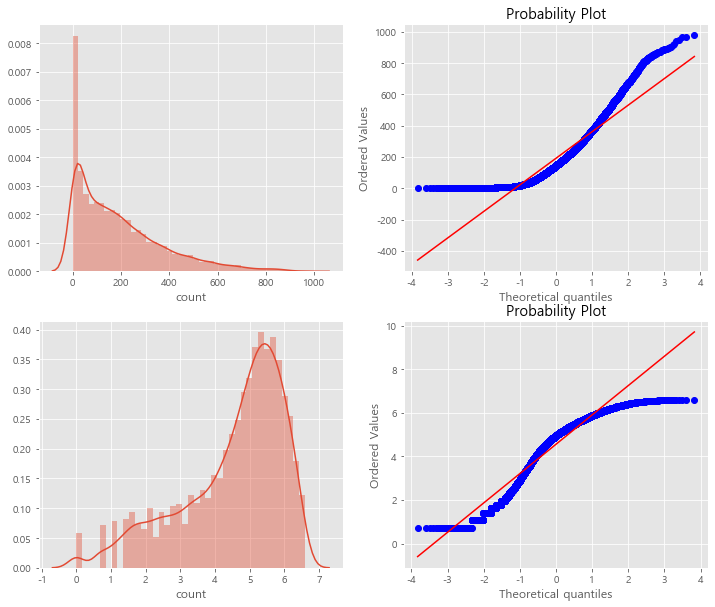

In [33]:
# count값의 데이터 분포도를 파악
figure,axes=plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

sns.distplot(train['count'],ax=axes[0][0])
stats.probplot(train['count'],dist='norm',fit=True,plot=axes[0][1])

sns.distplot(np.log(trainWithoutOutliers['count']),ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']),dist='norm',fit=True,plot=axes[1][1])

### ------------------

### 사이킷런: 파이썬 머신러닝 패키지
#### 지도학습/비지도학습을 나누는 가장 큰 기준은 labeled 된 data 여부(정답)
#### 지도학습의 4단계: classifier->fit->predict->score
여기서는 random forest 회귀분석을 할 것임
random forest를 사용하기 위해서는 decision tree에 대한 이해 필요
decision tree: T/F인지에 따라서 depth를 쌓아 최적화된 값을 찾는 것
속도 빠름, 시각화하여 설명하기 유용
이 decision tree의 장점을 모아 만든 것이 random forests
n개의 decision tree중 투표를 하여 결과를 냄

evaluate은 rmsle사용
-> 과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다
오차를 제곱해서 평균낸 값의 제곱근의 값이 작을수록 정밀도가 높다
0에 가까운 값이 나올수록 정밀도가 높은 값이다

cross validation 교차 검증
: 일반화 성능을 측정하기 위해 데이터를 여러 번 반복해서 나누고 여러 모델을 학습.
이 중 KFold 교차검증은 데이터를 폴드라고 부르는 비슷한 크기의 부분집합으로 나누고 각각의 폴드 정확도를 측정한다. 첫번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련세트로 사용하여 학습. 이후로는 두번째 폴드가 테스트 세트, 나머지는 훈련세트....이렇게 해서 마지막폴드까지 과정 반복. n개의 분할마다 정확도를 측정하여 평균값을 낸게 최종 정확도

### -----------------

In [2]:
import pandas as np
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

%matplotlib inline

mpl.rcParams['axes.unicode_minus']=False
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')

In [17]:
train=pd.read_csv('./train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [3]:
test=pd.read_csv('./test.csv', parse_dates=['datetime'])
test.shape

(6493, 9)

In [4]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [5]:
test['year']=train['datetime'].dt.year
test['month']=train['datetime'].dt.month
test['day']=train['datetime'].dt.day
test['hour']=train['datetime'].dt.hour
test['minute']=train['datetime'].dt.minute
test['second']=train['datetime'].dt.second
test['dayofweek']=train['datetime'].dt.dayofweek
test.shape

(6493, 16)

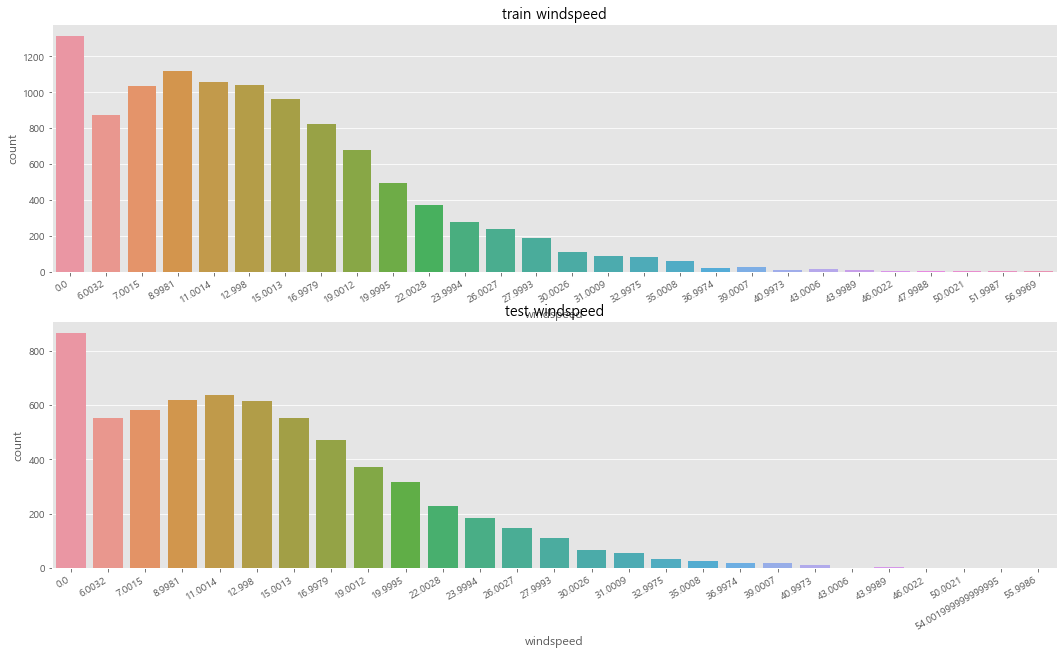

In [21]:
fig,axes=plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30,ha='right')
axes[0].set(ylabel='count',title='train windspeed')
sns.countplot(data=train,x='windspeed',ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30,ha='right')
axes[1].set(ylabel='count',title='test windspeed')
sns.countplot(data=test,x='windspeed',ax=axes[1])
#-> 0에 많은 데이터가 몰려있음 -> outlier 보정해야할듯

In [22]:
# 풍속이 0인 곳을 풍속의 평균으로 대체한다
# -> 예측의 정확도를 높이는데 큰 도움 X
# -> 퐁속이 0인 것과 아닌 것의 세트를 나누어 머신러닝으로 예측하여 outlier채움

trainWind0=train.loc[train['windspeed']==0]
trainWindNot0=train.loc[train['windspeed']!=0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [23]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0=data.loc[data['windspeed']==0]
    dataWindNot0=data.loc[data['windspeed']!=0]
    
    # 풍속을 예측할 feature를 선택
    wCol=['season','weather','humidity','month','temp','year','atemp']
    
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype('str')
    
    # 랜덤포레스트 분류기 사용
    rfModel_wind=RandomForestClassifier()
    
    # wCol에 있는 feature의 값을 바탕으로 풍속을 학습시킴
    rfModel_wind.fit(dataWindNot0[wCol],dataWindNot0['windspeed'])
    
    # 학습한 값을 바탕으로 풍속이 0인 데이터의 풍속값을 예측
    wind0Values=rfModel_wind.predict(X=dataWind0[wCol])
    
    # 예측한 값을 비교해보기 위해 예측한 값을 넣어 줄 데이터프레임 생성
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    # 값이 0인 풍속에 대해 예측한 값을 넣어줌
    predictWind0['windspeed']=wind0Values
    
    # dataWindNot0이 아닌 풍속이 있는 DF에 예측한 값이 있는 DF를 합침
    data=predictWindNot0.append(predictWind0)
    
    data['windspeed']=data['windspeed'].astype('float')
    
    data.reset_index(inplace=True)
    data.drop('index',inplace=True,axis=1)
    
    return data

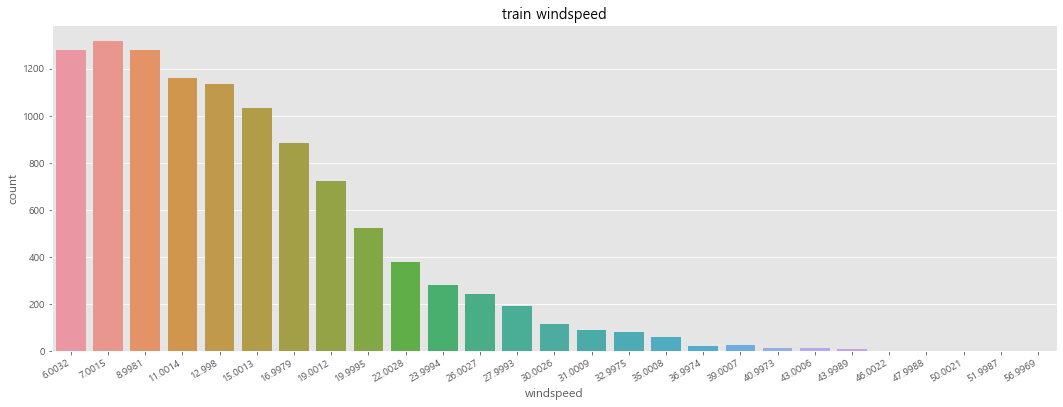

In [24]:
train=predict_windspeed(train)

fig,ax1=plt.subplots()
fig.set_size_inches(18,6)

# train의 풍속이 0인 값을 예측하여 대입 후 다시 countplot그리기
plt.sca(ax1)
plt.xticks(rotation=30,ha='right')
ax1.set(ylabel='count',title='train windspeed')
sns.countplot(data=train,x='windspeed', ax=ax1)

In [32]:
# outlier해결하고 이제 본격적으로 feature selection
# feature가 많다고 무조건 좋은 성능 X

### 연속형 feature: temp, humidity, windspeed, atemp
### 범주형 feature: season, holiday, weather 등등 -> ont-hot encoding필요

categorical_feature_names=['season','holiday','workingday','weather',
                          'dayofweek','month','year','hour']

for var in categorical_feature_names:
    train[var]=train[var].astype('category')
    test[var]=test[var].astype('category')

In [33]:
feature_names=['season','weather','temp','atemp','humidity',
              'windspeed','year','hour','dayofweek','workingday']
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'workingday']

In [34]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0


In [35]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,5,1
1,1,1,10.66,13.635,56,0.0000,2011,1,5,1
2,1,1,10.66,13.635,56,0.0000,2011,2,5,1
3,1,1,10.66,12.880,56,11.0014,2011,3,5,1
4,1,1,10.66,12.880,56,11.0014,2011,4,5,1


In [37]:
label_name='count'

y_train=train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [38]:
# rmsle 계산

from sklearn.metrics import make_scorer

def rmsle(predicted_values,actual_values):
    predicted_values=np.array(predicted_values)
    actual_values=np.array(actual_values)
    
    # 예측값과 실제값에 1을 더하고 로그를 씌워줌
    log_predict=np.log(predicted_values+1)
    log_actual=np.log(actual_values+1)
    
    # 오차의 제곱
    difference=log_predict-log_actual
    difference=np.square(difference)
    
    # 이것의 평균
    mean_difference=difference.mean()
    
    # 다시 루트
    score=np.sqrt(mean_difference)
    
    return score

rmsle_scorer=make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [39]:
# KFold방식으로 교차검증 수행

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [40]:
# random-forest만으로 예측

from sklearn.ensemble import RandomForestRegressor

max_depth_list=[]

# n_estimators는 높을 수록 성능이 좋지만 시간이 많이걸림
model=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)
model

RandomForestRegressor(n_jobs=-1, random_state=0)

In [41]:
%time score=cross_val_score(model,x_train,y_train,cv=k_fold,scoring=rmsle_scorer)

score=score.mean()
# 0에 근접할수록 좋은 데이터
print("Score={0:.5f}".format(score))

Wall time: 21.4 s
Score=0.33070


In [42]:
# 학습
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [44]:
# 예측
predictions=model.predict(x_test)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 25.61,  20.93,  18.03,  11.82,   2.27,   2.39,  35.84,  96.65,
       214.8 , 132.47])

[Text(0.5, 1.0, 'test')]

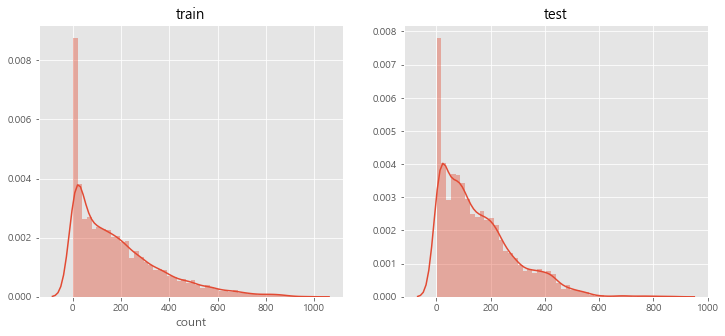

In [46]:
# 예측한 데이터 시각화
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title='train')

sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title='test')

In [47]:
submission=pd.read_csv('./sampleSubmission.csv')
submission

submission['count']=predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,25.61
1,2011-01-20 01:00:00,20.93
2,2011-01-20 02:00:00,18.03
3,2011-01-20 03:00:00,11.82
4,2011-01-20 04:00:00,2.27


In [48]:
submission.to_csv('./Score_({0:.5f}_submission.csv'.format(score),index=False)

In [ ]:
# 이렇게하면 상위 12%정도 성적

### ------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import font_manager, rc

%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

# 그래프에서 한글깨짐 오류에 대한 대처
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
train=pd.read_csv('./train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [3]:
test=pd.read_csv('./test.csv', parse_dates=['datetime'])
test.shape

(6493, 9)

In [4]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['hour']=train['datetime'].dt.hour
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 16)

In [5]:
test['year']=train['datetime'].dt.year
test['month']=train['datetime'].dt.month
test['hour']=train['datetime'].dt.hour
test['dayofweek']=train['datetime'].dt.dayofweek
test.shape

(6493, 13)

In [6]:
### 연속형 feature: temp, humidity, windspeed, atemp
### 범주형 feature: season, holiday, weather 등등 -> ont-hot encoding필요
### -> one hot encoding햇는데 score에 큰 변화가 없어서 하지않음

categorical_feature_names=['season','holiday','workingday','weather',
                          'dayofweek','month','year','hour']

for var in categorical_feature_names:
    train[var]=train[var].astype('category')
    test[var]=test[var].astype('category')

In [7]:
feature_names=['season','weather','temp','atemp','humidity',
              'year','hour','dayofweek','holiday','workingday']

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [8]:
x_train=train[feature_names]

print(x_train.shape)
x_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [9]:
x_test=test[feature_names]

print(x_test.shape)
x_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,5,0,1
1,1,1,10.66,13.635,56,2011,1,5,0,1
2,1,1,10.66,13.635,56,2011,2,5,0,1
3,1,1,10.66,12.880,56,2011,3,5,0,1
4,1,1,10.66,12.880,56,2011,4,5,0,1


In [10]:
label_name='count'
y_train=train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [12]:
# rmsle 계산

from sklearn.metrics import make_scorer

def rmsle(predicted_values,actual_values,convertExp=True):
    if convertExp:
        predicted_values=np.exp(predicted_values)
        actual_values=np.exp(actual_values)
    
    predicted_values=np.array(predicted_values)
    actual_values=np.array(actual_values)
    
    # 예측값과 실제값에 1을 더하고 로그를 씌워줌
    log_predict=np.log(predicted_values+1)
    log_actual=np.log(actual_values+1)
    
    # 오차의 제곱
    difference=log_predict-log_actual
    difference=np.square(difference)
    
    # 이것의 평균
    mean_difference=difference.mean()
    
    # 다시 루트
    score=np.sqrt(mean_difference)
    
    return score

In [14]:
# 선형회귀모델: 매개변수가 없는 것이 장점이지만 모델의 복잡도 제어 X

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore',category=DeprecationWarning)

# 선형회귀 모델 초기화
lModel=LinearRegression()

# 모델 학슴
y_train_log=np.log1p(y_train)
lModel.fit(x_train,y_train_log)

# 예측하고 정확도 평가
preds=lModel.predict(x_train)
print('RMSLE Value For Linear Regreesion: ',
     rmsle(np.exp(y_train_log),np.exp(preds),False))

RMSLE Value For Linear Regreesion:  0.9803697923313518


In [30]:
# Rigdge 모델: 선형 회귀모델로 모든 feature가 주는 영향을 최소화.
# regularization은 overfitting이 되지 않도록 모델을 강제로 제한하기위한 것

ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit( x_train, y_train_log )
preds = grid_ridge_m.predict(x_train)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train_log),np.exp(preds), False))

df = pd.DataFrame(grid_ridge_m.cv_results_)
df.head()

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9803697902780835


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013173,0.002233,0.004385,0.000485,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.003138,-0.906726,-1.029928,-1.016631,-0.982313,-0.987747,0.043461,1
1,0.013365,0.002239,0.005584,0.001353,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.003140,-0.906726,-1.029928,-1.016630,-0.982315,-0.987748,0.043461,2
2,0.012766,0.002310,0.004587,0.000798,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.003167,-0.906727,-1.029927,-1.016621,-0.982331,-0.987755,0.043461,3
3,0.013764,0.002130,0.005584,0.001018,2,3000,"{'alpha': 2, 'max_iter': 3000}",-1.003196,-0.906728,-1.029926,-1.016612,-0.982349,-0.987762,0.043461,4
4,0.014447,0.003484,0.004787,0.000748,3,3000,"{'alpha': 3, 'max_iter': 3000}",-1.003226,-0.906729,-1.029925,-1.016602,-0.982366,-0.987770,0.043460,5


In [31]:
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
df[["alpha", "rmsle"]].head()

,alpha,rmsle
0,0.01,0.987747
1,0.10,0.987748
2,1.00,0.987755
3,2.00,0.987762
4,3.00,0.987770


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

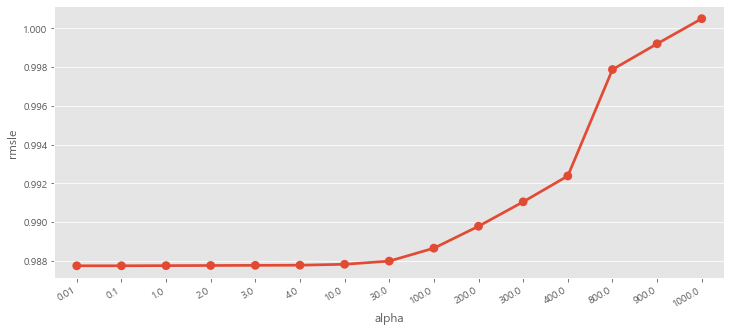

In [32]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [35]:
# Lasso: 선형회귀의 Regularization을 적용하는 대안. L1,L2가 있음
# feature선택이 자동으로 이루어짐

lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit( x_train , y_train_log )
preds = grid_lasso_m.predict(x_train)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train_log),np.exp(preds),False))

df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)

df[["alpha", "rmsle"]].head()

{'alpha': 0.00125, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.980372782145765


,alpha,rmsle
0,10.000000,1.397124
1,1.000000,1.071947
2,0.500000,1.062110
3,0.333333,1.060815
4,0.250000,1.061139


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

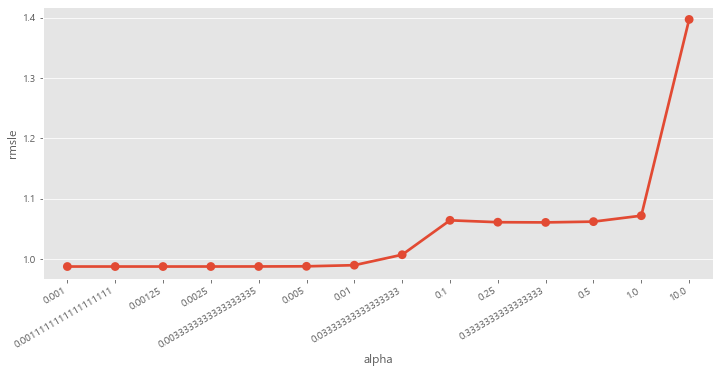

In [36]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [37]:
# 앙상블 모델-랜덤포레스트

from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(x_train, y_train_log)

preds = rfModel.predict(x_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.10649851232461441


In [39]:
# 앙상블 모델-그래디언트 부스트
# : 여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법
# 회귀와 분류 모두에 사용
# 무작위성 X, 1~5개의 깊지않은 트리 -> 메모리 적게 사용, 예측 빠름

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(x_train, y_train_log)

preds = gbm.predict(x_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.21357403727840335


<AxesSubplot:>

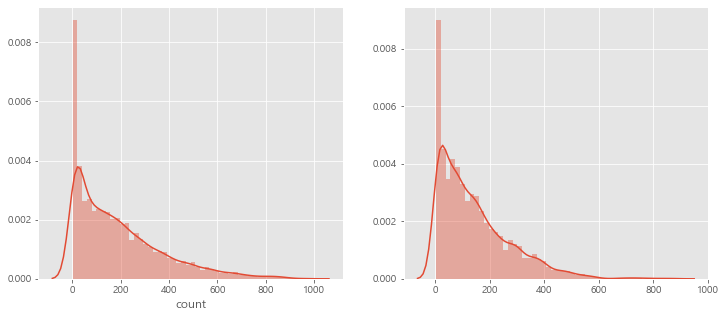

In [40]:
# -> 랜덤포레스트 결과가 가장 좋았음!
predsTest=rfModel.predict(x_test)
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [41]:
# submit

submission = pd.read_csv("./sampleSubmission.csv")
submission

submission["count"] = np.exp(predsTest)

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,17.455969
1,2011-01-20 01:00:00,10.930799
2,2011-01-20 02:00:00,13.221845
3,2011-01-20 03:00:00,9.285842
4,2011-01-20 04:00:00,2.705727


In [42]:
submission.to_csv("./Score_{0:.5f}_submission.csv".format(score), index=False)

In [ ]:
# 이렇게 하면 상위 3프로 정도